# Introduction

In this notebook we will try to make the most suitable Machine Learning model that would predict the chances of survival for a passenger of the ship Titanic. \
On 15th April 1912 the Titanic sank on its maiden voyage. The ship coasted $7.5 M to build, and it sank after colliding with a iceberg. That accident took life of approximately 1500 of its passenger out of total passenger around 2200.
 

# Workflow

1. Import Data
2. Exploratory Data Analysis (EDA)
3. Data Modelling
4. Prediction Model
5. Submit Prediction

# 1. Import Data

Firstly we need to import some libraries like Pandas, Numpy, Matplotlib and Seaborn.\
This libraries will help us in importing data and also in EDA

In [9]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# importing training data
data_train = data=pd.read_csv('/content/drive/MyDrive/dataset/train.csv')

# First 5 rows of training data
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# importing test data
data_test = data=pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

# First 5 rows of training data
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
print("Rows and columns of training data : " ,data_train.shape)
print("Rows and columns of testing data : " ,data_test.shape)

Rows and columns of training data :  (891, 12)
Rows and columns of testing data :  (418, 11)


From the shape of the Data, we can see that training data has 12 columns and testing data has 11 column.\
"Survived" column is missing from testing data, which is our **target variable**.

In [14]:
data_train.info()
print('-'*40)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

Both training and testing data has null values.
1. Training Data : Age, Cabin and Embarked 
2. Testing Data : Age, Cabin and Fare



# 2. EDA

In [15]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [16]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Disrtibution on Features:**
\
**Numerical Features: **
* Passenger ID is unique key (Primary key / index).
* Around 38% samples survived.
* Survived is a categorical feature with 0 or 1 values.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80. 
\
 **Categorical Feature:**
* Names are unique across the dataset.
* Sex variable as two possible values with 65% male.
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers.
* Ticket feature also has duplicate values.

## Survived

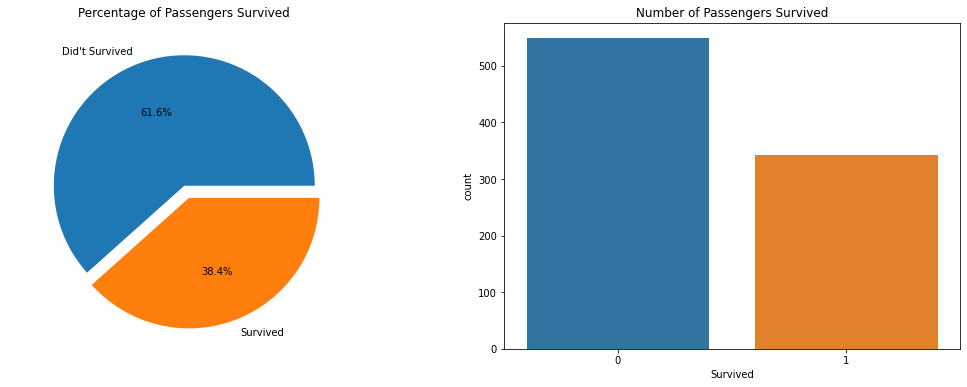

,Survived
0,549
1,342


In [17]:
#Create two blank plot in a single row (1,2) of figure size (18,8)
f,ax=plt.subplots(1,2,figsize=(18,6))

# Use ax = ax[0] to plot on 1st plot
data_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', labels = ["Did't Survived" , "Survived"], ax = ax[0])
ax[0].set_title('Percentage of Passengers Survived')
ax[0].set_ylabel(' ')

# Use ax = ax[1] to plot on 1st plot
sns.countplot(x = 'Survived',data=data_train,ax=ax[1])
ax[1].set_title('Number of Passengers Survived')

plt.show()

# Count of survived
data_train['Survived'].value_counts().to_frame()

## Pclass

In [18]:
pd.crosstab(data_train.Pclass , data_train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


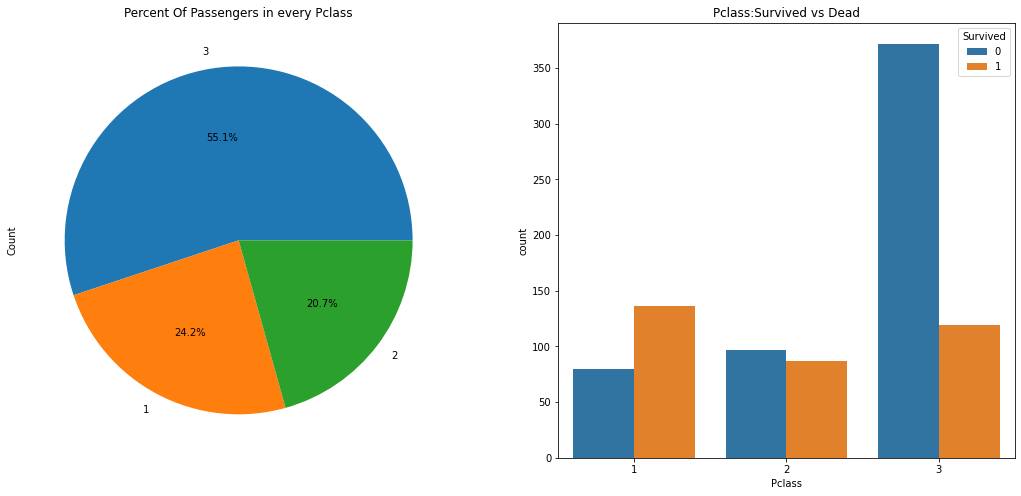

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))

data_train['Pclass'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], labels = [3,1,2])
ax[0].set_title('Percent Of Passengers in every Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x = 'Pclass',hue='Survived',data=data_train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()


**Pclass:**
1. Here we can see most people are form Pclass 3.
2. In Pcalss 1, no of people survived (136) is more than no of people didn't survived (80).
3. For Pclass 2, the number of people that survived (87) and did't survived (97) is almost equal.
4. For Pclass 3, almost thrice  didn't survived (372) then survied (119)

## Sex

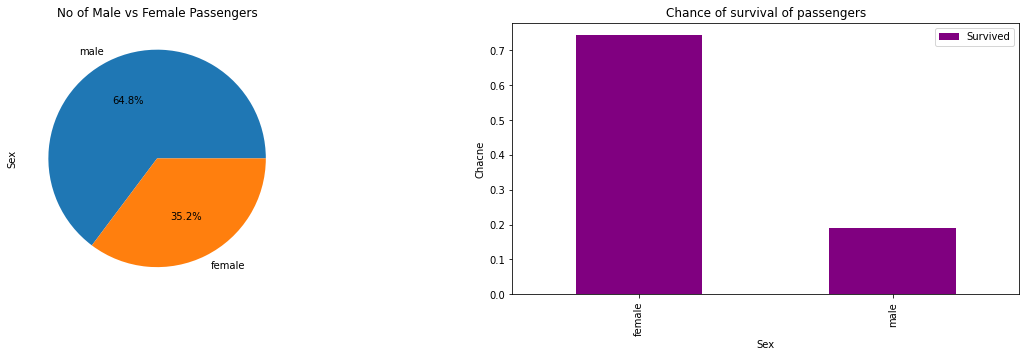

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,5))

data_train['Sex'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('No of Male vs Female Passengers')
ax[0].set_ylabel('Sex')

data_train[['Sex','Survived']].groupby('Sex').mean().plot.bar(color = ['purple'] , ax = ax[1])
ax[1].set_title('Chance of survival of passengers')
ax[1].set_ylabel('Chacne')

plt.show()

**Sex**
1. More male passengers (64.8% ) than female passenger (35.2%) .
2. Female passengers have way more chance of survival (0.74) than male passengers (0.18).

## Age

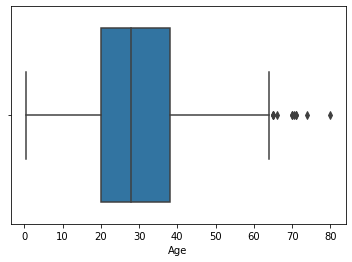

In [21]:
sns.boxplot(x = data_train['Age'])

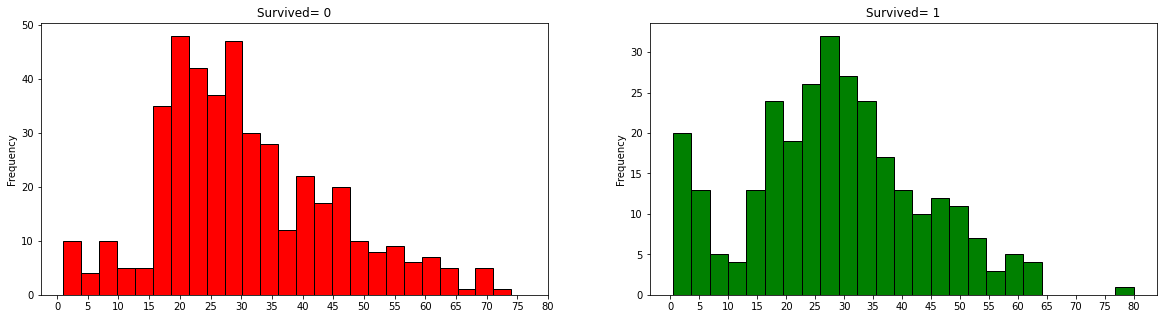

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,5))

data_train[data_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=25,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data_train[data_train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=25,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

Text(0.5, 1.0, 'Age vs Chance of survival')

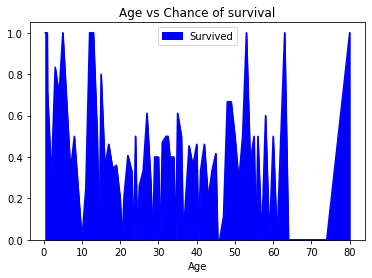

In [23]:
data_train[['Age','Survived']].groupby('Age').mean().plot.area(color = 'blue').set_title("Age vs Chance of survival")

**Age**
1. Here we can see that passengers from lower age group and higher age group have more chance of survial.
2. Most passenger who didnt survived are in middle age group.

## SibSp

In [24]:
data_train['SibSp'].value_counts().to_frame()

,SibSp
0,608
1,209
2,28
4,18
3,16
8,7
5,5


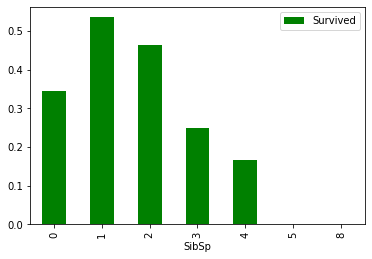

In [25]:
data_train[['SibSp' , 'Survived']].groupby('SibSp').mean().plot.bar(color = 'green') 

**SibSp**
1. For passengers travelling with 1 and 2  has more chances of survivial compared to others.
2. Passengers travleeing in larger groups of 5 and 8 didn't survivied.

## Parch

In [26]:
Parch_Sur = pd.DataFrame()
Parch_Sur['Survived Passengers'] = data_train[['Parch' , 'Survived']].groupby('Parch').sum()
Parch_Sur['Toal Passengers'] = data_train[['Parch' , 'Survived']].groupby('Parch').count()
Parch_Sur['Chance of survival'] = data_train[['Parch' , 'Survived']].groupby('Parch').mean()
Parch_Sur

,Survived Passengers,Toal Passengers,Chance of survival
Parch,,,
0,233,678,0.343658
1,65,118,0.550847
2,40,80,0.500000
3,3,5,0.600000
4,0,4,0.000000
5,1,5,0.200000
6,0,1,0.000000


Text(0.5, 1.0, 'Plot')

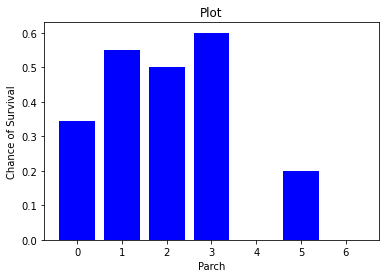

In [27]:
plt.bar(Parch_Sur.index , Parch_Sur['Chance of survival'] , color = 'blue')
plt.ylabel("Chance of Survival")
plt.xlabel("Parch")
plt.title("Plot")

## Fare

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


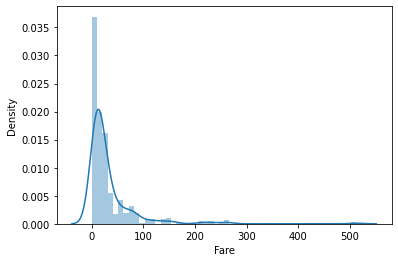

In [28]:
sns.distplot(a = data_train['Fare'])

In [29]:
data_train[['Fare' , 'Survived']].corr()

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


## Embarked

In [30]:
data_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

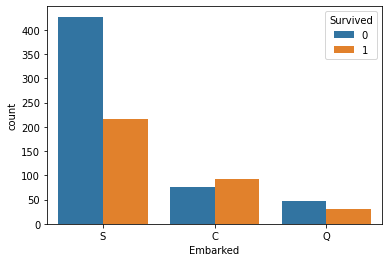

In [31]:
sns.countplot(x = data_train['Embarked'] , hue = data_train['Survived'] )

In [32]:
data_train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


**Embarked**
1. Most passener embarked from "S"
2. Chance of survival for Embarked at C is most (55%).
3. Althoogh most passengers embarked from S, chance of survival is least for them (0.33)

# 3. Data Modeling

Now after geeting some insight from our data. We now will prepare our data for modeling.\
\
**Null Values** 
1. We want to fill null values for Age column.
2. We will drop the whole cabin column as it has too many null values.
3. We will drop rows with Embarked as missing value as only 2 rows are missing.

**Continous Features**
1. We will make Age column categorical.
2. We will make Fare column categorical.

**Numerical Feature**
1. We will make Sex column numerical.
2. We will make Embarked numerical

**Combined Feature**
1. We will make a new column "Alone" by using "SibSp" and "Parch"


**Drop Column**
1. We will drop Name column
2. We will drop Ticket Column

In [33]:
data = data_train.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Age

First we will fill null values in Age column.\
We can fill it with mean of Age.

In [34]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
data[['Age' , 'Sex']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


But we can see that mean age of "Male" is 30.7 and mean age of "Female" is 27.9\
Hence instead of filling null values with mean of Age.\
Filling it with mean of Age based on gender is more suitbale.

But , we have another coulmn that we can use : Name\
Observe that "Name" also have initials in it like Mr. , Mrs., Miss.,.
If we can find mean age for all initials we can use that to fill null age value and that would be more appropiate.

In [36]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Initial      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


We have initial for all passengers. Nows lets find mean age for initials.

In [37]:
data[['Initial','Age']].groupby('Initial').mean()

,Age
Initial,
Capt,70.000000
Col,58.000000
Countess,33.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167


In [38]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Observe we have some missspelled terms as well like mlle or mms. And we also dont need that much Initials.\
We will keep , Mr. Mrs. Master, miss and rest we will group as others.

In [39]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [40]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Now we can use this to fill null Values.

In [41]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [42]:
data.Age.isnull().any()

False

Now We have no null values in Age section.\
What we can do is, we can now make a new column for age band.\
This is called binning. To convert continous feature to categorical.

In [43]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


## Alone

We will combine "SibSp" and "Parch" because they both represent how many passengers were traveling together.\
Instead we will make a new column "Family Size" that will be the sum of "SibSp" and "Parch".\
And other column, "Alone" that will show passenger we alone or not.

In [44]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


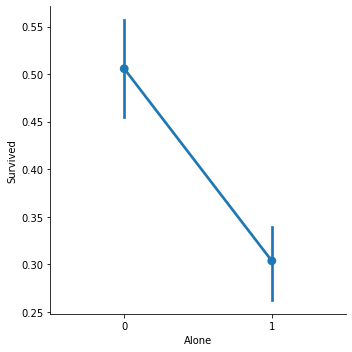

In [45]:
sns.factorplot(x = 'Alone', y = 'Survived',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


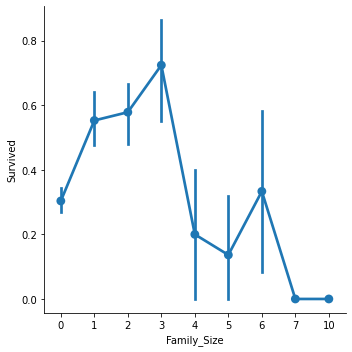

In [46]:
sns.factorplot('Family_Size','Survived',data=data)

## Fare

For Fare we will use "qcut" from pandas to convert fare from continous to ordinal.

In [47]:
data['Fare_Range']=pd.qcut(data['Fare'],5)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


Fare still plays a important role after spliting it and making it ordinal. Hence we can do that.

In [48]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.85,'Fare_cat']=0
data.loc[(data['Fare']>7.85)&(data['Fare']<=10.5),'Fare_cat']=1
data.loc[(data['Fare']>10.5)&(data['Fare']<=21.68),'Fare_cat']=2
data.loc[(data['Fare']>21.68)&(data['Fare']<=39.69),'Fare_cat']=3
data.loc[(data['Fare']>39.69)&(data['Fare']<=512.33),'Fare_cat']=4

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


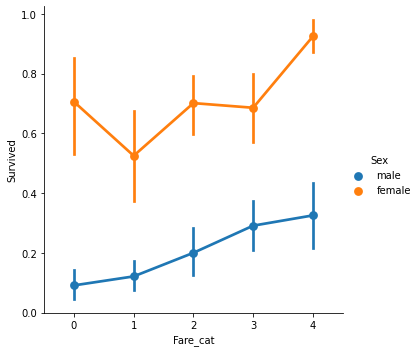

In [49]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

With increase in fare price, survival rate increase for both male and female

## String to Numeric

In [50]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [51]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0,1,1,0,"(-0.001, 7.854]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,2,1,0,"(39.688, 512.329]",4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,2,1,0,1,"(7.854, 10.5]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,2,1,0,"(39.688, 512.329]",4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,2,0,1,"(7.854, 10.5]",1


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    float64 
 12  Initial      891 non-null    int64   
 13  Age_band     891 non-null    int64   
 14  Family_Size  891 non-null    int64   
 15  Alone        891 non-null    int64   
 16  Fare_Range   891 non-null    category
 17  Fare_cat     891 non-null    int64   
dtypes: category(1), float64(3), in

## Drop 

**First we will drop "Cabin"**

In [53]:
data = data.drop(['Cabin'], axis = 1)

**Now we will drop rows with Embarked as null value**

In [54]:
data = data.dropna(subset = ['Embarked'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Name         889 non-null    object  
 4   Sex          889 non-null    int64   
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Embarked     889 non-null    float64 
 11  Initial      889 non-null    int64   
 12  Age_band     889 non-null    int64   
 13  Family_Size  889 non-null    int64   
 14  Alone        889 non-null    int64   
 15  Fare_Range   889 non-null    category
 16  Fare_cat     889 non-null    int64   
dtypes: category(1), float64(3), int64(11), object(2)
memory usage: 119.2+ KB


## Date for modeling

Now we will keep only the columns that we will use for modeling.

In [55]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0,0,1,1,0,"(-0.001, 7.854]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0,1,2,1,0,"(39.688, 512.329]",4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0,2,1,0,1,"(7.854, 10.5]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0,1,2,1,0,"(39.688, 512.329]",4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0,0,2,0,1,"(7.854, 10.5]",1


In [56]:
data.drop(['Name','Age','Ticket','Fare','Fare_Range','PassengerId'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0.0,0,1,1,0,0
1,1,1,1,1,0,1.0,1,2,1,0,4
2,1,3,1,0,0,0.0,2,1,0,1,1
3,1,1,1,1,0,0.0,1,2,1,0,4
4,0,3,0,0,0,0.0,0,2,0,1,1


Now as "Family_Size" and "Alone" are deriver from "Parch" and "SibSp", we can drop later two.\
Also "Initial" and "Age_band" contains same info we can drop one of them.

In [57]:
data.drop(['Parch','SibSp','Initial'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Embarked,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,0.0,1,1,0,0
1,1,1,1,1.0,2,1,0,4
2,1,3,1,0.0,1,0,1,1
3,1,1,1,0.0,2,1,0,4
4,0,3,0,0.0,2,0,1,1


# Predicition Model

Import all models, metrics and other modules from Sci-kit Learn

In [58]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [59]:
X = data[['Pclass' , 'Sex' , 'Embarked' , 'Age_band' , 'Family_Size' , 'Alone' , 'Fare_cat']]

In [60]:
Y = data[['Survived']]

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.7,random_state = 0)

## Logistic Regression

In [68]:
model_LR = LogisticRegression()
model_LR.fit(X_train,Y_train)
Log_R_pred = model_LR.predict(X_test)
as_LR = metrics.accuracy_score(Log_R_pred ,Y_test)
print('The accuracy of the Logistic Regression is',as_LR)

The accuracy of the Logistic Regression is 0.7640449438202247


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Decision Tree

In [63]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,Y_train)
DT_pred = model_DT.predict(X_test)
as_DT = metrics.accuracy_score(DT_pred ,Y_test)
print('The accuracy of the Decision Tree is',as_DT)

The accuracy of the Decision Tree is 0.7752808988764045


## K-Nearest Neighbour (KNN)

In [64]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train,Y_train)
KNN_pred = model_KNN.predict(X_test)
as_KNN = metrics.accuracy_score(KNN_pred ,Y_test)
print('The accuracy of the KNN is',as_KNN)

The accuracy of the KNN is 0.7715355805243446


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Random Forest

In [65]:
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train,Y_train)
RF_pred = model_RF.predict(X_test)
as_RF = metrics.accuracy_score(RF_pred ,Y_test)
print('The accuracy of the RF is', as_RF)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


The accuracy of the RF is 0.7865168539325843


**We compare all this Models below:**

In [66]:

model_score = { 'Logistic Regression' : as_LR , 'Random Forest' : as_RF , 'KNN' : as_KNN ,'Decision Tree' : as_DT }
model_score


{'Logistic Regression': 0.7640449438202247,
 'Random Forest': 0.7865168539325843,
 'KNN': 0.7715355805243446,
 'Decision Tree': 0.7752808988764045}

In [67]:
models = pd.DataFrame(list(model_score.items()) , columns = ['Model' , 'Score'])
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.786517
3,Decision Tree,0.775281
2,KNN,0.771536
0,Logistic Regression,0.764045


# Result

We can see that Random Forest is giving us the maximum accuracy score (0.78). \
Hence we will use Random Forest as our prediction model.